In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pickle
import core
import importlib
# importlib.reload(core)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
from IPython.display import display as print

In [2]:
db_csv_path = "dataset/data.csv"
idata_save_path = "odes-exp04-idata-4-number-1core-c0number-halfnormks-from-core.py-success.dt"

dataset_ori = core.MyDataset(db_csv_path)
df_ori = dataset_ori.get_df()
cct_names, rates_names, error_names = dataset_ori.get_var_col_names()
c0 = df_ori[cct_names].iloc[0].values


/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:368: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


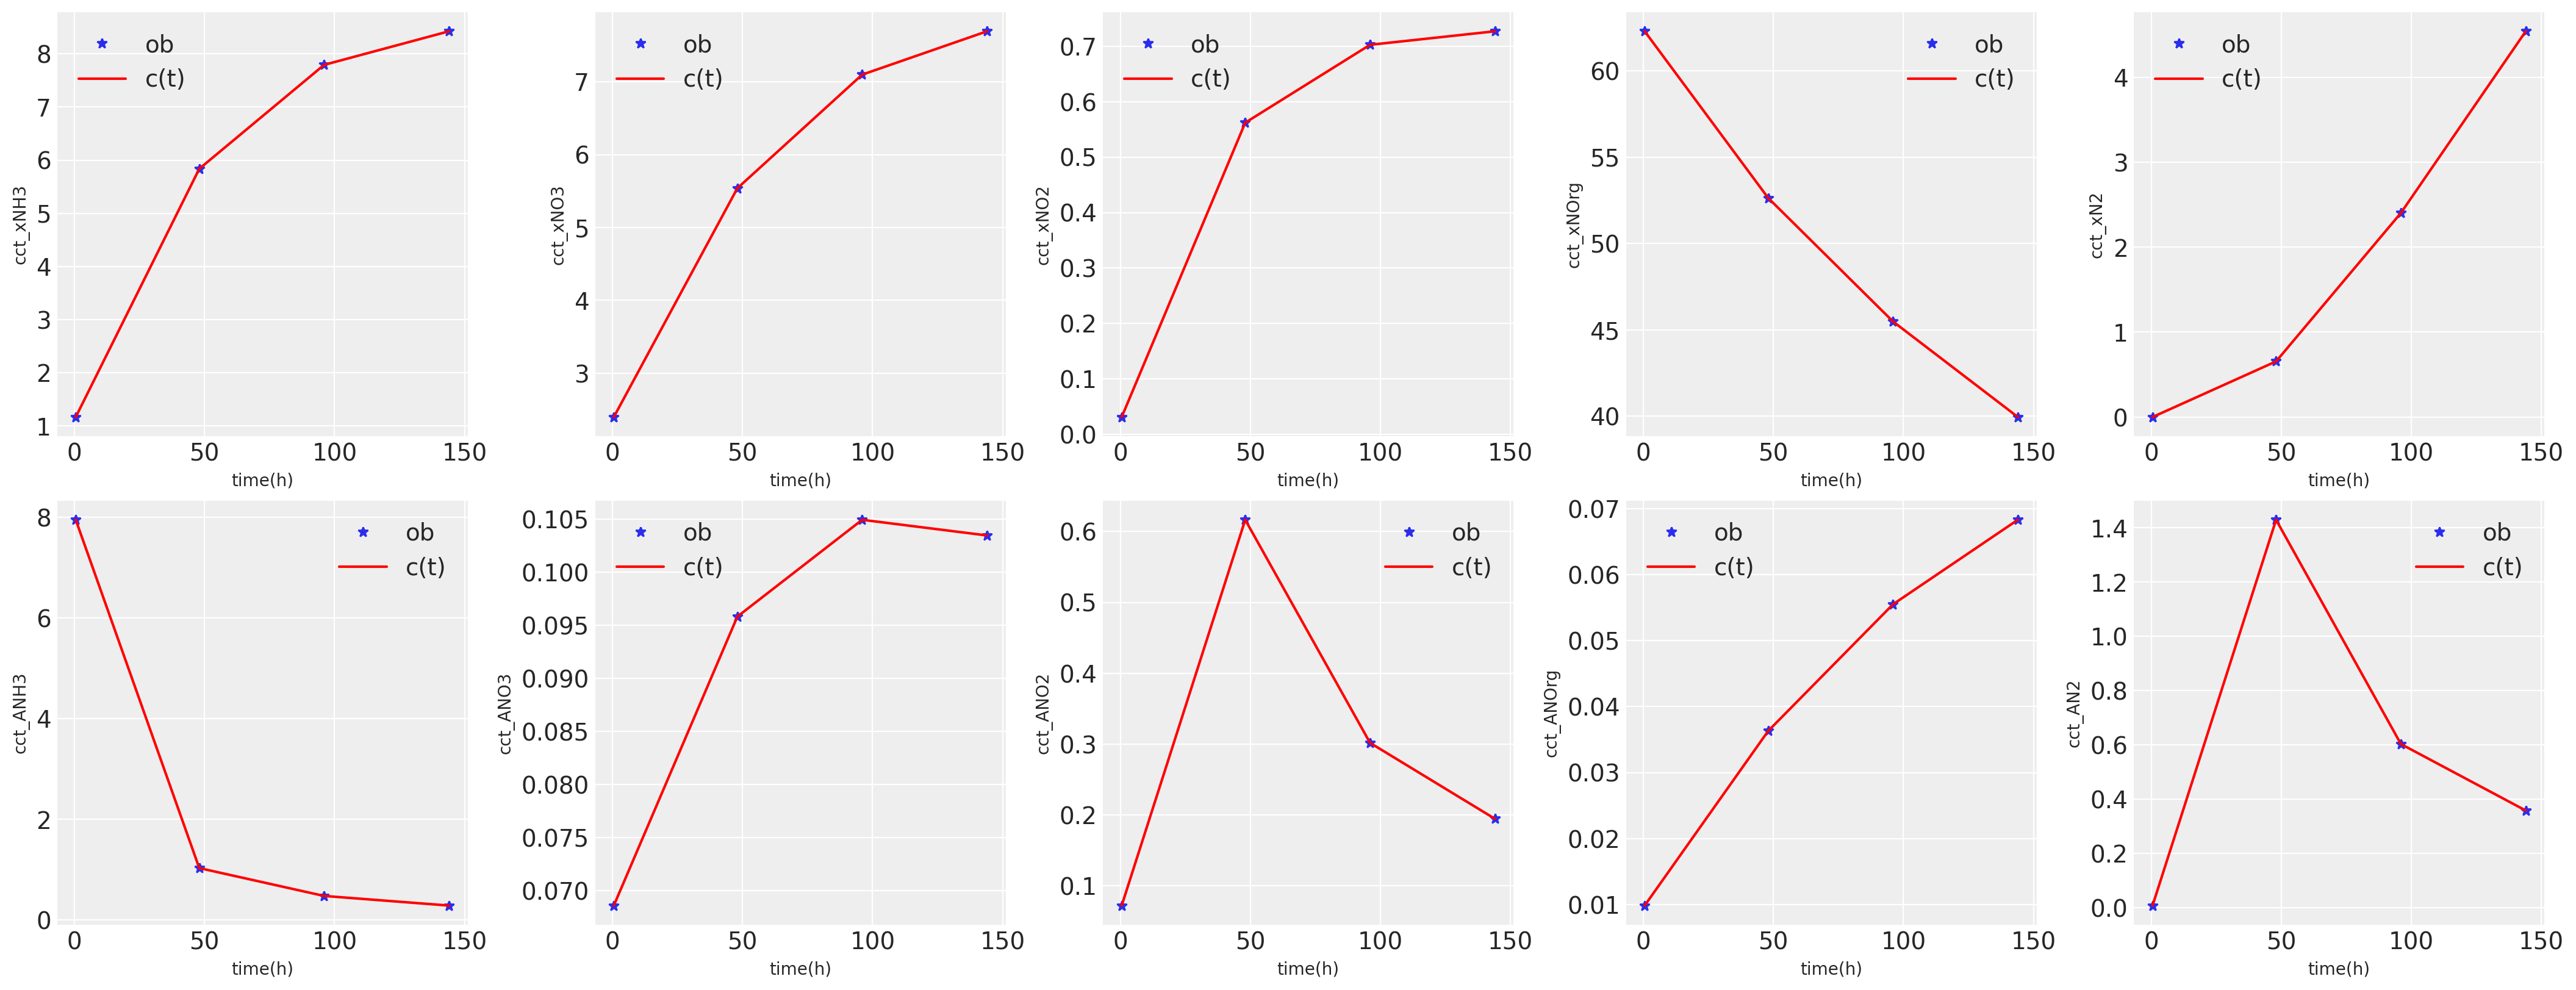

In [3]:
# 假设都是一级动力学
k_kinetics = np.repeat(1, 11).astype(np.uint8) 
# k_kinetics = np.array([0,0,0,0,1,1,0,0,1,1,0]).astype(np.uint8) 
ks = np.array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299, 0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432, 0.00177611])
#  =======================================================

# t_eval = np.linspace(0.5, 150, 8)
t_eval = np.array([0.5, 48, 96, 144])


dataset = core.MyDataset(db_csv_path)
df = dataset.get_df()
cct_names, rates_names, error_names = dataset.get_var_col_names()
c0 = df[cct_names].iloc[0].values

dataset.set_as_sim_dataset(core.get_dcdts(), t_eval, c0, args=(ks, k_kinetics))
df = dataset.get_df()

core.plot_dataset(dataset, dataset)

In [4]:
mcmc_model = core.get_model(dataset, t_eval, k_kinetics, distance=core.distance_func, epsilon=core.epsilon, k_sigma_priors=0.01, kf_type=0, c0_type=0)

[1.16666667e+00 2.39880952e+00 3.11000000e-02 6.22850000e+01
 7.11000000e-05 7.94863498e+00 6.85792330e-02 7.23100000e-02
 9.85666700e-03 8.32000000e-03]


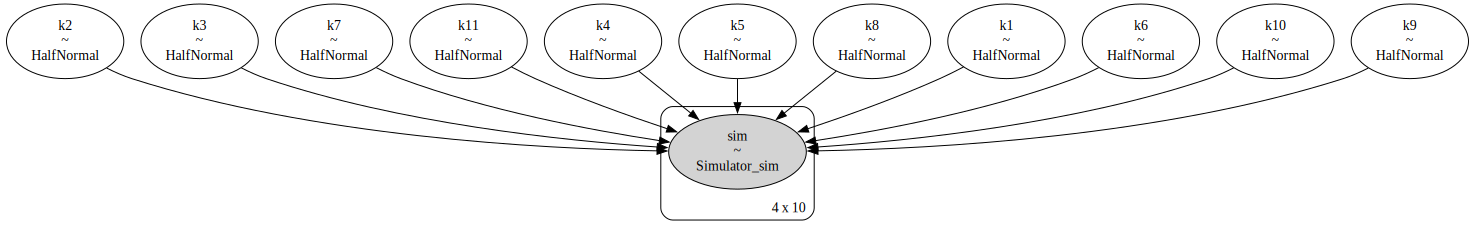

In [5]:
# print(get_format_time(),idata_save_path)
# print(ks, c0)
pm.model_to_graphviz(mcmc_model)

In [7]:
# print(idata_save_path)
# idata_lv = pickle.load(open(idata_save_path, 'rb'))
# 19:24-25
print(core.get_format_time())
idata_lv = pm.sample_smc(draws=2000, chains=1, model=mcmc_model, progressbar=True)
print(core.get_format_time())
# pickle.dump(idata_lv,open(idata_save_path, 'wb'))

Only one chain was sampled, this makes it impossible to run some convergence checks


'2023-3-03 20:07:47'

In [8]:
# az.plot_trace(idata_lv, kind="rank_vlines");
df[cct_names]

,xNH3,xNO3,xNO2,xNOrg,xN2,ANH3,ANO3,ANO2,ANOrg,AN2
0,1.166667,2.398810,0.031100,62.285000,0.000071,7.948635,0.068579,0.072310,0.009857,0.008320
1,5.837077,5.539303,0.562166,52.633247,0.654963,1.032250,0.095816,0.616494,0.036313,1.429357
2,7.792400,7.098904,0.702743,45.482189,2.402741,0.478912,0.104943,0.301793,0.055503,0.603151
3,8.424316,7.693937,0.727132,39.954083,4.541125,0.288235,0.103466,0.194706,0.068306,0.358341


In [9]:
print(az.summary(idata_lv, round_to=10))
print(ks)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k1,0.001524,0.000946,0.000213,0.003234,0.000027,0.000019,1158.057125,769.879765,NaN
k2,0.003031,0.000412,0.002283,0.003764,0.000013,0.000009,1156.061655,665.763106,NaN
k3,0.010022,0.006014,0.001468,0.021339,0.000190,0.000148,1063.994630,689.141312,NaN
k4,0.004827,0.000556,0.003894,0.005901,0.000015,0.000010,1415.109735,1262.039345,NaN
k5,0.006395,0.003222,0.001301,0.012187,0.000090,0.000064,1137.095458,797.956879,NaN
k6,0.008207,0.000844,0.006677,0.009754,0.000025,0.000018,1131.215567,1078.437553,NaN
k7,0.002347,0.001403,0.000383,0.004793,0.000041,0.000031,1100.519666,863.531705,NaN
k8,0.003773,0.002294,0.000377,0.007891,0.000070,0.000055,1152.510467,629.490175,NaN
k9,0.004182,0.000169,0.003845,0.004476,0.000005,0.000003,1413.603764,599.445584,NaN
k10,0.002184,0.000214,0.001777,0.002574,0.000006,0.000004,1405.017244,1089.370584,NaN


array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299,
       0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432,
       0.00177611])

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


'r2_loss'

0.9999848527578653

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:371: UserWarning: The figure layout has changed to tight
  


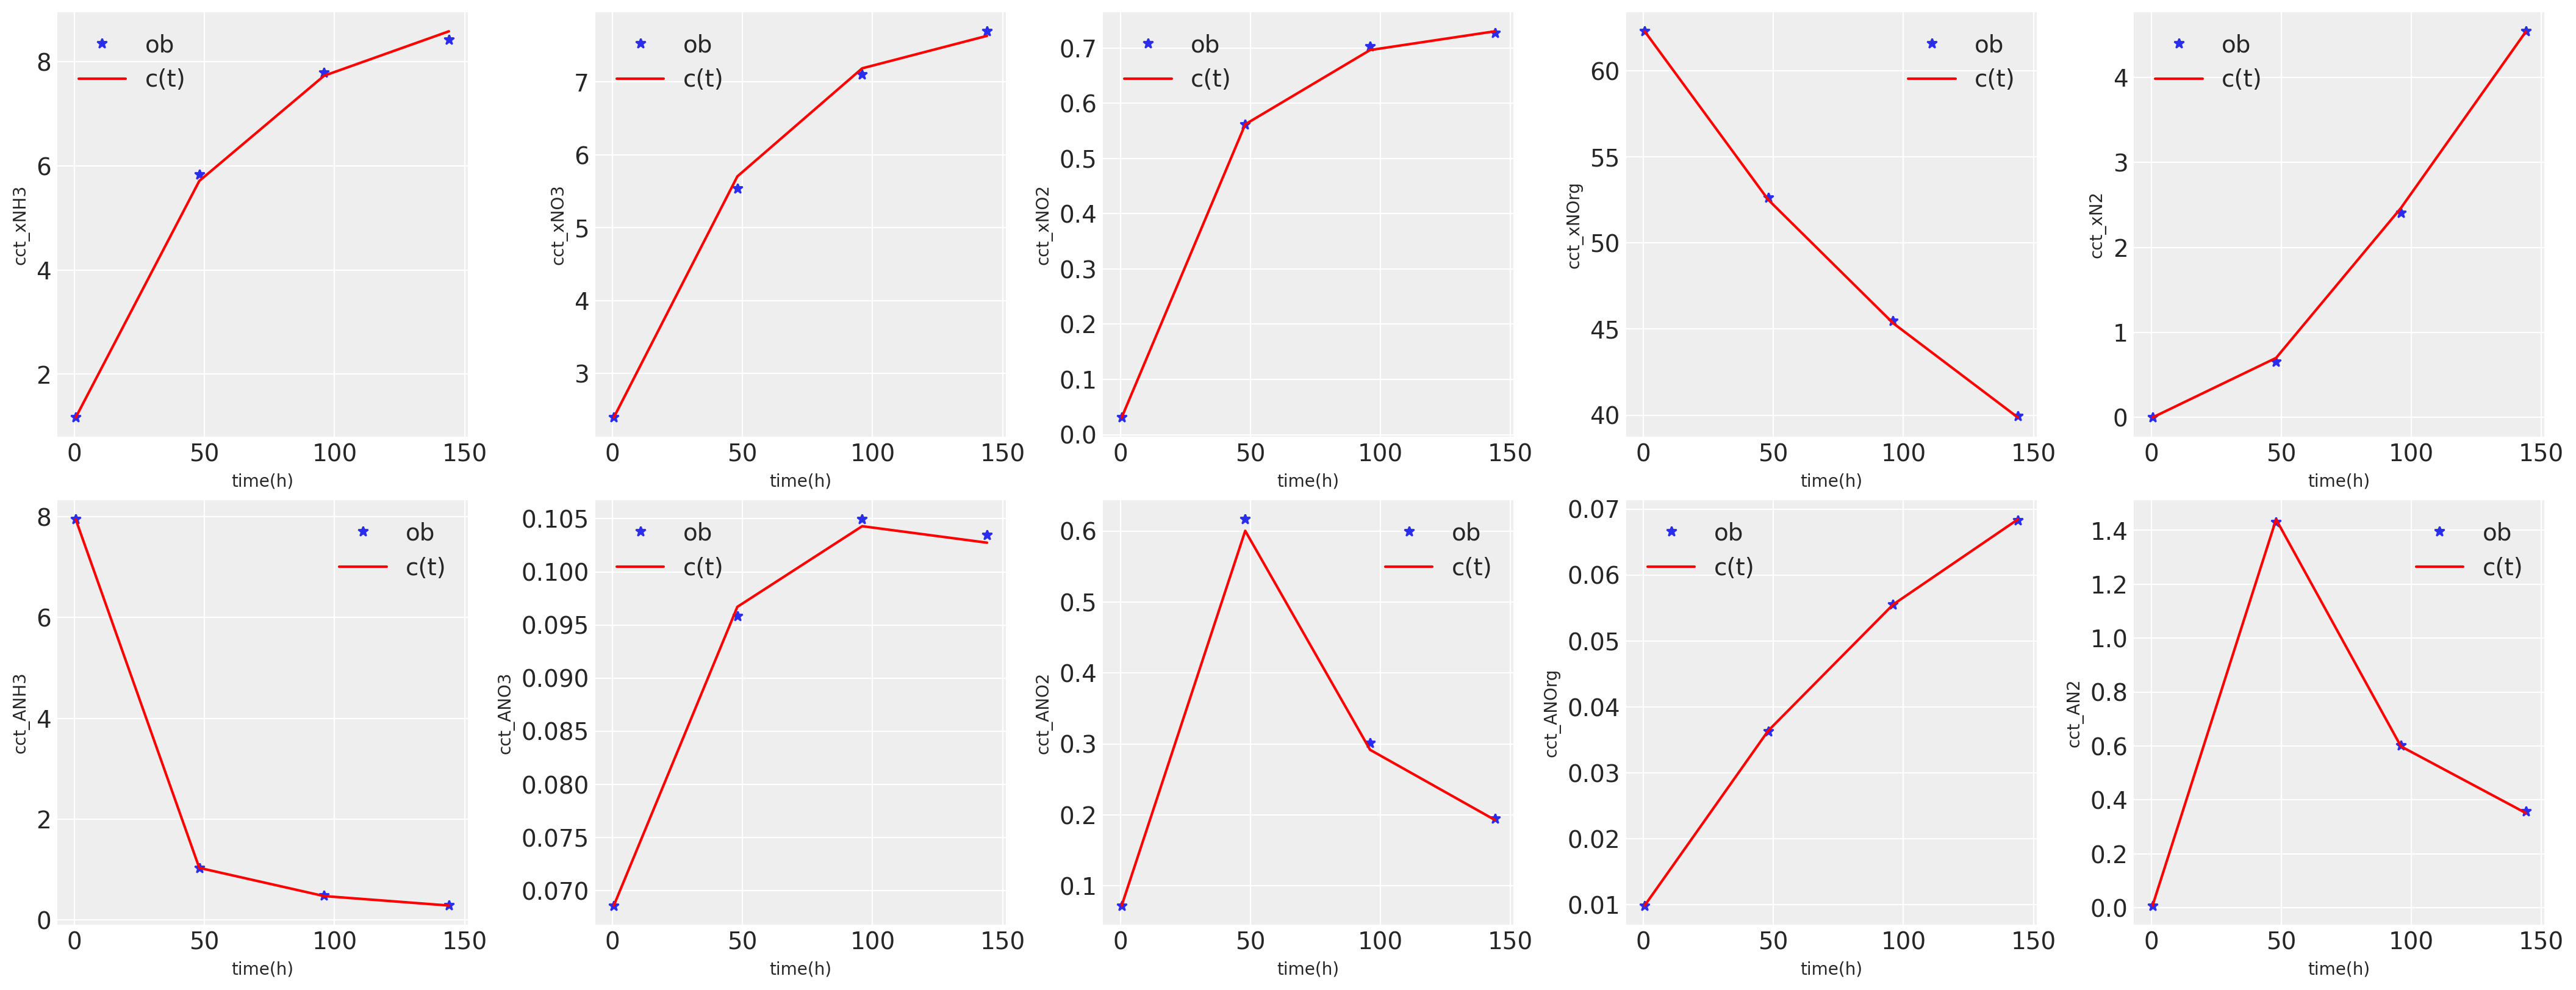

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:371: UserWarning: The figure layout has changed to tight
  


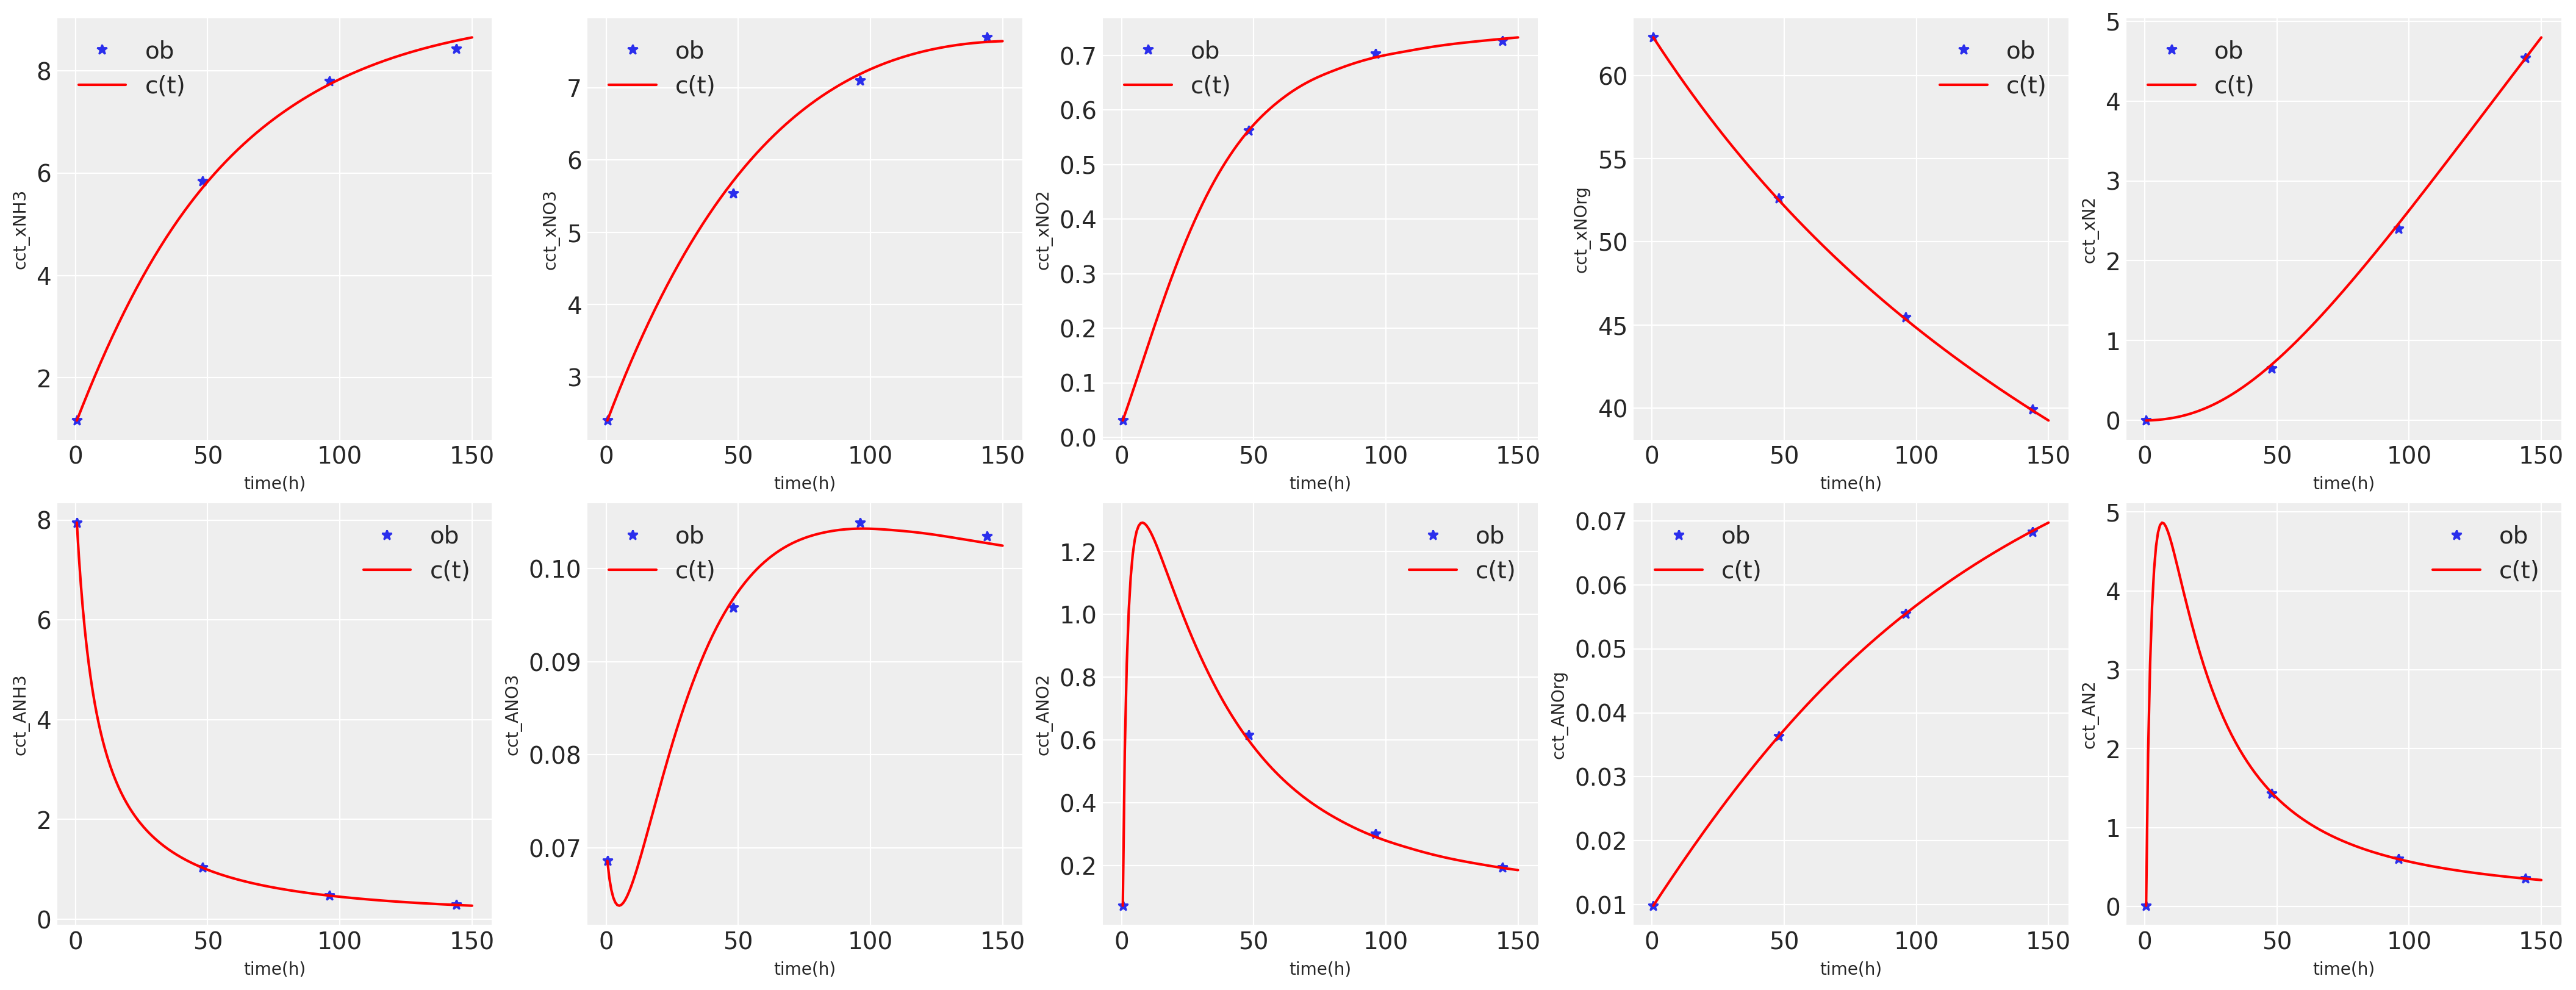

In [14]:
ks_predict = core.get_predict_ks(idata_lv)
k_kinetics = np.repeat(1, 11).astype(np.uint8)
t_eval = np.array([0.5, 48, 96, 144])

dataset_new = core.MyDataset(db_csv_path)
cct_names, rates_names, error_names = dataset_new.get_var_col_names()
gt_s = dataset_new.get_cct()[0]

dataset_new.set_as_sim_dataset(core.get_dcdts(), t_eval, gt_s, args=(ks_predict, k_kinetics))

print("r2_loss", core.r2_loss(dataset_new.get_cct(), dataset.get_cct()))
core.plot_dataset(dataset, dataset_new)


t_eval_new = np.linspace(0.5, 150, 200)
dataset_new2 = core.MyDataset(db_csv_path)
dataset_new2.set_as_sim_dataset(core.get_dcdts(), t_eval_new, gt_s, t0=0.5, args=(ks_predict, k_kinetics))
core.plot_dataset(dataset, dataset_new2)